In [1]:
baseline_test_wer ={
    "aln": 0.741,
    "bew": 0.427,
    "bxk": 0.41,
    "cgg": 	0.44,
    "el-CY": 0.312,
    "hch": 	0.591,
    "kcn": 0.504,
    "koo": 0.61,
    "led": 0.362,
    "lke": 0.695,
    "lth": 	0.336,
    "meh": 0.408,
    "mmc": 0.625,
    "pne": 0.404,
    "ruc": 0.59,
    "rwm": 0.658,
    "sco": 0.377,
    "tob": 1.014,
    "top": 0.995,
    "ttj": 0.354,
    "ukv": 	0.467,
    "ady": 0.8,
    "bas": 0.644,
    "kbd": 0.669,
    "qxp": 0.31,
    "ush": 1.001
}

baseline_dev_wer ={
    "aln": 0.548,
    "bew": 0.5,
    "bxk": 0.513,
    "cgg": 	0.44,
    "el-CY": 0.433,
    "hch": 	0.67,
    "kcn": 0.526,
    "koo": 0.701,
    "led": 0.332,
    "lke": 0.553,
    "lth": 	0.37,
    "meh": 0.406,
    "mmc": 0.692,
    "pne": 0.358,
    "ruc": 0.602,
    "rwm": 0.695,
    "sco": 0.36,
    "tob": 1.026,
    "top": 0.996,
    "ttj": 0.27,
    "ukv": 	0.406,
    "ady": 0.8,
    "bas": 0.644,
    "kbd": 0.669,
    "qxp": 0.31,
    "ush": 1.001
}

In [13]:
import pandas as pd
import json
import numpy as np
import os
# model = "results/whisper-large-v3"
model = "results/whisper-tiny"
rows = []
summary_df = pd.read_csv(f"{model}/summary.csv")
for result in os.listdir(f"{model}/hyperparameters"):
    with open(f"{model}/hyperparameters/" + result, "r") as f:
        hyps = json.load(f)
        f.close()
    if len(hyps) == 0:
        lang_name = result.split(".")[0]
        best_score = None
        best_lambda = None
        score_0 = summary_df.loc[summary_df["language"] == lang_name].wer.item()
    else:
        lang_name = result.split(".")[0]
        best_score = hyps[min(hyps, key=hyps.get)]
        best_lambda = min(hyps, key=hyps.get)
        score_0 = hyps["0.0"]

    rows.append([lang_name, best_score, score_0, baseline_dev_wer[lang_name],  
                 best_lambda, best_score - score_0 if best_score is not None else None, best_score-baseline_dev_wer[lang_name]if best_score is not None else None])

df = pd.DataFrame(rows, columns=["lang", "wer", "wer_no_HR", "baseline", "best_lambda", "HR gains", "delta baseline"])
df['improved'] = np.where(df['wer'] < df['baseline'], True, False)

df.sort_values(by="lang")

,lang,wer,wer_no_HR,baseline,best_lambda,HR gains,delta baseline,improved
4,ady,0.795538,0.809799,0.800,0.06166533159405762,-0.014261,-0.004462,True
5,aln,0.667619,0.712988,0.548,0.26116354655453594,-0.045369,0.119619,False
18,bas,0.502275,0.522451,0.644,0.07762210514681732,-0.020176,-0.141725,True
1,bew,0.693497,0.719578,0.500,0.16770409047603607,-0.026080,0.193497,False
13,bxk,0.731586,0.827373,0.513,0.05461112563112686,-0.095786,0.218586,False
6,cgg,0.630863,0.656413,0.440,0.0606248393525952,-0.025550,0.190863,False
9,el-CY,0.646169,0.663706,0.433,0.13308841961227935,-0.017537,0.213169,False
3,hch,0.709910,0.767118,0.670,0.09650212107226253,-0.057208,0.039910,False
20,kbd,0.595148,0.601934,0.669,0.07669474510475993,-0.006785,-0.073852,True
22,kcn,0.619492,0.645036,0.526,0.08704126158266626,-0.025545,0.093492,False


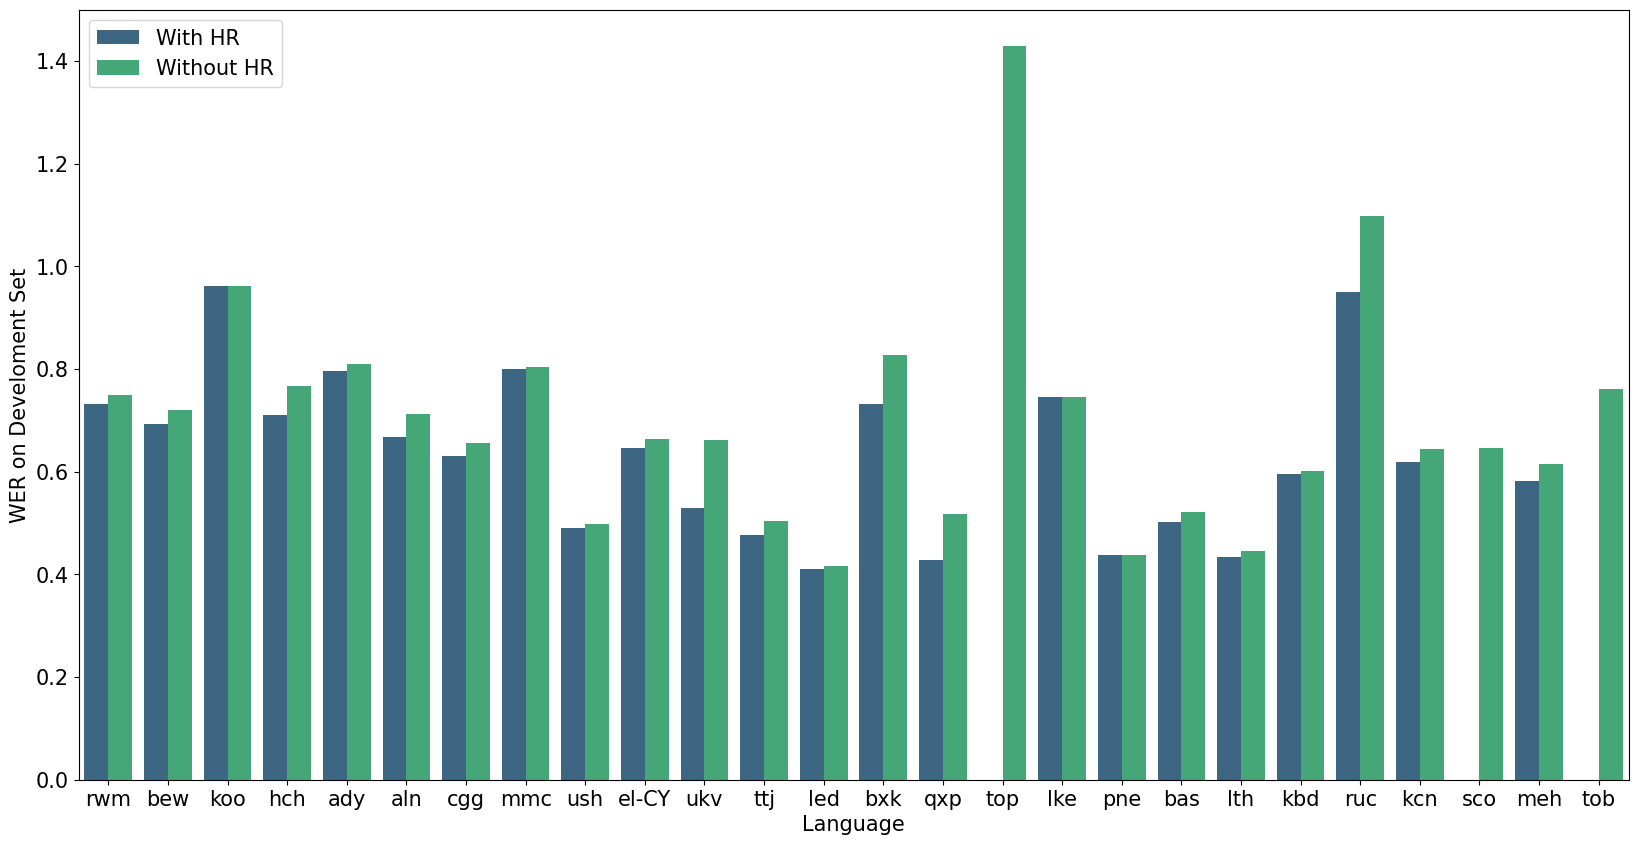

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 10))


df2 = df[["lang", "wer", "wer_no_HR"]]
# Create a mapping for the new labels
label_mapping = {"wer": "With HR", "wer_no_HR": "Without HR"}


df2.set_index('lang', inplace=True)
df2 = df2.stack().to_frame('value').reset_index()

df2.rename(columns={'level_1':'Item'},inplace=True)
# Apply the mapping to the 'smoker' column
df2['Item'] = df2['Item'].map(label_mapping)
ax = sns.barplot(data=df2, x='lang', y='value', hue='Item',palette="viridis")
ax.legend(loc='upper left', fontsize=15)
ax.set_xlabel("Language", fontsize=15)
ax.set_ylabel("WER on Develoment Set",  fontsize=15)
ax.tick_params(labelsize=15)
